## 1. Requeriments

In [161]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [162]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random

## 3. Graph building

### 3.1. Gene matrix

In [163]:
genes = pd.read_csv('../../../Data\PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_2776_genes_839_nodes.csv')
Y = genes.Y

genes = genes.iloc[:,1:839] 
genes

,ABCB1,ABCB6,ABCG2,ABL2,ACADM,ACD,ACE,ACE2,ACHE,ACO2,...,XRCC4,XRCC6,YAP1,YBX1,YBX3,YY1,ZBTB17,ZHX2,ZMIZ1,ZMPSTE24
0,36.716012,33.867624,29.676682,32.862716,35.061520,31.801427,31.988036,30.172489,29.912204,35.812113,...,29.79709,35.24634,33.97677,37.51551,35.75761,33.53412,31.72285,33.23150,32.38760,32.22373
1,34.174577,32.703008,31.318871,33.061603,35.908450,31.878071,33.015718,33.634947,26.076400,34.834669,...,31.29674,35.91455,34.75610,36.67356,35.85355,34.44291,31.63512,32.63491,33.78434,32.19111
2,31.225510,34.522351,30.612181,32.658413,34.370223,31.425178,31.714695,26.858096,27.589284,34.449024,...,31.37668,36.05801,34.48484,36.41164,35.24518,35.14050,31.99899,34.31359,32.95630,32.77568
3,32.988641,33.059035,31.973489,33.014431,35.824161,31.829645,32.916062,29.565514,28.143610,35.401370,...,30.65271,35.75676,35.27953,36.58061,36.19379,34.96911,31.28469,33.03073,33.88207,32.46805
4,33.284849,31.488348,30.774368,33.793065,34.332987,32.020127,31.824945,28.767942,26.537023,33.068712,...,31.10007,36.33015,34.50745,36.89459,34.95292,34.76483,33.40109,32.15993,33.35772,31.64157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,33.838323,32.296025,30.740420,33.040376,34.981970,31.823358,32.748254,25.870831,27.355529,34.695167,...,30.75886,35.53767,34.82946,37.20378,36.41314,34.69950,32.89423,33.07640,33.73563,32.02075
177,31.895951,33.784466,29.347511,31.571621,34.865097,29.786302,29.720601,30.945513,23.149098,32.541787,...,32.96204,35.50224,33.69401,36.55929,35.16855,34.89385,33.76237,31.38631,30.87456,32.16958
178,33.842290,32.838072,29.862937,33.491465,34.379400,31.246333,33.114433,25.870831,28.926076,33.864699,...,29.63276,35.22805,34.52318,36.62523,35.18621,34.88021,31.47358,31.68824,33.42545,32.62316
179,34.715293,32.561403,29.292590,33.151894,34.802123,32.344355,33.543569,32.700981,29.967641,35.307358,...,31.09475,34.81409,34.59853,34.81241,35.19760,34.37022,31.75344,33.62427,33.09948,31.49508


In [164]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,ABCB1,ABCB6,ABCG2,ABL2,ACADM,ACD,ACE,ACE2,ACHE,ACO2,...,XRCC4,XRCC6,YAP1,YBX1,YBX3,YY1,ZBTB17,ZHX2,ZMIZ1,ZMPSTE24
0,0.913055,0.671207,0.629264,0.440491,0.462644,0.610824,0.385954,0.599127,0.716215,0.805240,...,0.590076,0.495999,0.350519,0.653839,0.589186,0.283179,0.394627,0.559013,0.297360,0.527435
1,0.611207,0.444017,0.793442,0.498055,0.651154,0.619572,0.560882,0.864018,0.399519,0.596648,...,0.766505,0.686270,0.533618,0.470341,0.610968,0.578967,0.378959,0.378272,0.571863,0.520119
2,0.260945,0.798929,0.722790,0.381359,0.308776,0.567881,0.339427,0.345563,0.524427,0.514349,...,0.775910,0.727119,0.469887,0.413257,0.472842,0.806014,0.443946,0.886840,0.409127,0.651230
3,0.470353,0.513469,0.858887,0.484402,0.632393,0.614045,0.543919,0.552691,0.570194,0.717585,...,0.690737,0.641339,0.656595,0.450083,0.688218,0.750231,0.316372,0.498188,0.591070,0.582232
4,0.505534,0.207065,0.739005,0.709763,0.300488,0.635785,0.358194,0.491674,0.437550,0.219782,...,0.743368,0.804610,0.475199,0.518513,0.406487,0.683743,0.694362,0.234373,0.488018,0.396864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.571270,0.364624,0.735611,0.491911,0.444938,0.613327,0.515356,0.270034,0.505128,0.566877,...,0.703225,0.578954,0.550854,0.585899,0.738020,0.662480,0.603837,0.512024,0.562290,0.481909
177,0.340574,0.654984,0.596355,0.066808,0.418925,0.380828,0.000000,0.658266,0.157832,0.107333,...,0.962423,0.568866,0.284087,0.445437,0.455444,0.725736,0.758887,0.000000,0.000000,0.515290
178,0.571741,0.470365,0.647884,0.622471,0.310818,0.547469,0.577685,0.270034,0.634797,0.389650,...,0.570743,0.490791,0.478895,0.459808,0.459454,0.721296,0.350108,0.091472,0.501330,0.617022
179,0.675428,0.416393,0.590864,0.524188,0.404908,0.672791,0.650731,0.792566,0.720792,0.697522,...,0.742742,0.372918,0.496598,0.064714,0.462040,0.555308,0.400091,0.678005,0.437266,0.364008


### 3.2. Graph edges

In [165]:
path ='../../../Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/network_edges_mrcc_2776_genes_839_nodes.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data[data.columns[1]].to_numpy()
edge_index2=data[data.columns[2]].to_numpy()

In [166]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [167]:
edge_index

array(['EPO', 'EPO', 'EPO', ..., 'SMAD4', 'SMAD4', 'GATA3'], dtype=object)

In [168]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

838

In [169]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [170]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [171]:
edge_index

array([[245, 245, 245, ..., 692, 693, 245],
       [342, 301, 246, ..., 694, 694, 302]])

In [172]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[245, 245, 245,  ..., 692, 693, 245],
        [342, 301, 246,  ..., 694, 694, 302]])

### 3.3. Create dataset

In [173]:
list_data_0=[]
list_data_1=[]
total_data=[]
for g in range(len(genes)):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    a.append(i*100)
    b.append(a)
  x = torch.tensor([b], dtype=torch.long).reshape([-1])
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  total_data.append(data)
  if y == 0:
    list_data_0.append(data)
  else:
    list_data_1.append(data)

print(list_data_0[0])

Data(x=[838], edge_index=[2, 8425], y=[1, 1])


C:\Users\sandr\AppData\Local\Temp/ipykernel_2952/1747583445.py:11: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  x = torch.tensor([b], dtype=torch.long).reshape([-1])


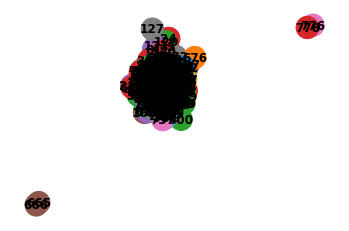

Algunas estadísticas del grafo:
Número de Características: 1
Número de Nodos: 838
Número de bordes: 8425
Grado promedio de nodos: 10.05
¿Contiene nodos aislados?: False
¿Contiene autoloops?: False
¿Es no dirigido?: False


C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch_geometric\deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch_geometric\deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [174]:
def plot_graph(data,description=True):
    edges_raw = data.edge_index.numpy()
    edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
    labels = data.x.numpy()
    G = nx.Graph()
    G.add_nodes_from(list(range(np.max(edges_raw))))
    G.add_edges_from(edges)
    plt.subplot(111)
    options = {
       'node_size': 500,
       'width': 1,
    }
    nx.draw(G, with_labels=description, node_color=labels.tolist(), cmap=plt.cm.tab10, font_weight='bold', **options)
    plt.show()
    # print(len(nx.node_connected_component(G, 127)))
    # print((nx.node_connected_component(G, 665)))
    # print((nx.node_connected_component(G, 778)))


plot_graph(data,True)
print("Algunas estadísticas del grafo:")
print(f'Número de Características: {data.num_features}')
print(f'Número de Nodos: {data.num_nodes}')
print(f'Número de bordes: {data.num_edges}')
print(f'Grado promedio de nodos: {data.num_edges / data.num_nodes:.2f}')
print(f'¿Contiene nodos aislados?: {data.contains_isolated_nodes()}')
print(f'¿Contiene autoloops?: {data.contains_self_loops()}')
print(f'¿Es no dirigido?: {data.is_undirected()}')


In [175]:
len(list_data_1)

96

### 3.4. Patient sample

In [176]:
data = list_data_0[0]
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 838
Number of charcateristics per node: 1
Number of edges: 8425
Average node degree: 10.05
Has isolated nodes: False
Has self-loops: False
Is undirected: False


## 4. Graph training

### 4.2. Training and testing the model

In [177]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [178]:
embed_dim = 6

class Net(torch.nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()
        self.dim = dim
        super(Net, self).__init__()
        self.conv1 = GraphConv(embed_dim, dim)
        self.pool1 = SAGPooling(dim, ratio=0.1)
        self.conv2 = GraphConv(dim, dim)
        self.pool2 = SAGPooling(dim, ratio=0.1)
        self.item_embedding = torch.nn.Embedding(num_embeddings=101, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(1200, 500)
        self.lin2 = torch.nn.Linear(500, 10)
        self.lin3 = torch.nn.Linear(500, 1)
        self.act1 = torch.nn.RReLU()
        print(self)

    def forward(self, x, edge_index, batch):
        x = torch.tensor(x) #.to(torch.int)
        # print(x.long())
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        # x = F.relu(self.conv2(x, edge_index))
        # x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        # x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 #+ x2

        x = self.lin1(x)
        x = self.act1(x)
        # x = self.lin2(x)
        # x = self.act1(x)
        x = F.dropout(x, p=0.8, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)
        return x


In [179]:
def train(epoch):
    model.train()
    criterion = nn.BCELoss()
    loss_all = 0
    for data in train_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_all += loss.item() * data.num_graphs

    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data
        output = model(data.x, data.edge_index, data.batch)
        for i in range(len(output)):
            if output[i]>0.5:
                output[i]=1
            else:
                output[i]=0
            if output[i]==data.y[i]:
                correct=correct+1
    # print("Correct: "+str(correct) +" of "+str(len(loader.dataset)))
    return correct / len(loader.dataset)

In [180]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [181]:
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader

test_avg = []
for train_index, test_index in kf.split(total_data, Y):
    train_dataset=[]
    test_dataset=[]
    print("TRAIN: ", train_index, "TEST:", test_index)
    for i in train_index:
        train_dataset.append(total_data[i])
    for i in test_index:
        test_dataset.append(total_data[i])

    print(len(train_dataset))
    print(len(test_dataset))
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

    model = Net(dim=600)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
    # optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7) # 35 epochs

    train_epoch=[]
    test_epoch=[]
    epoch = 1
    train_acc=0
    while epoch < 150:
        loss = train(epoch)
        train_acc = test(train_loader)
        test_acc = test(test_loader)
        train_epoch.append(train_acc)
        test_epoch.append(test_acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        epoch +=1

    plt.plot(train_epoch, color="red")
    plt.plot(test_epoch, color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    test_avg.append(test_acc)

print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test stv: '+ str(np.array(test_avg).std()))

TRAIN:  [ 30  32  33  34  40  41  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 35 36 37 38 39 42]
144
37
Net(
  (conv1): GraphConv(6, 600)
  (pool1): SAGPooling(GraphConv, 600, ratio=0.1, multiplier=1.0)
  (conv2): GraphConv(600, 600)
  (pool2): SAGPooling(GraphConv, 600, ratio=0.1, multiplier=1.0)
  (item_embedding): Embedding(101, 6)
  (lin1): Linear(in_features=1200, out_features

C:\Users\sandr\AppData\Local\Temp/ipykernel_2952/922151203.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x) #.to(torch.int)


Epoch: 001, Loss: 0.9369, Train Acc: 0.4722, Test Acc: 0.4595
Epoch: 002, Loss: 0.8724, Train Acc: 0.4722, Test Acc: 0.4595
Epoch: 003, Loss: 0.7807, Train Acc: 0.4722, Test Acc: 0.4595
Epoch: 004, Loss: 0.8597, Train Acc: 0.4722, Test Acc: 0.4595
Epoch: 005, Loss: 0.7641, Train Acc: 0.4722, Test Acc: 0.4595
Epoch: 006, Loss: 0.7719, Train Acc: 0.5000, Test Acc: 0.4595
Epoch: 007, Loss: 0.7161, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 008, Loss: 0.7174, Train Acc: 0.4722, Test Acc: 0.4595
Epoch: 009, Loss: 0.7438, Train Acc: 0.5556, Test Acc: 0.4324
Epoch: 010, Loss: 0.7171, Train Acc: 0.4792, Test Acc: 0.4595
Epoch: 011, Loss: 0.7407, Train Acc: 0.5208, Test Acc: 0.4054
Epoch: 012, Loss: 0.7010, Train Acc: 0.4722, Test Acc: 0.4595
Epoch: 013, Loss: 0.7375, Train Acc: 0.5069, Test Acc: 0.4324
Epoch: 014, Loss: 0.6939, Train Acc: 0.5069, Test Acc: 0.4324
Epoch: 015, Loss: 0.7089, Train Acc: 0.5903, Test Acc: 0.4324
Epoch: 016, Loss: 0.7271, Train Acc: 0.5139, Test Acc: 0.4324
Epoch: 0

KeyboardInterrupt: 